# Market Intelligence

In [1]:
from src.Form10k import Form10kAnalyzer, Form10kExtractor, clean_text
import streamlit as st
import pandas as pd

Importing Dependancies
Completed Imports


In [2]:
section = 'Risk Factors'

myform = Form10kExtractor(download_path = r"documentRepo", company = "Adobe Systems Inc.", section = section ,is_ticker = False)
myformanalysis = Form10kAnalyzer(myform)

Extracting Report
Extracting Section
sections extracted!
Unable to indentify individual headers. Extracting each paragraph as a subsection instead
subsections extracted!
Entities extracted!
Sentiment extracted


In [6]:
import spacy

headerstext = [clean_text(header.text) if type(header) is spacy.tokens.span.Span else clean_text(header) for header in myform.subsection_headers_]
contentstext = [clean_text(content.text) if type(content) is spacy.tokens.span.Span else clean_text(content) for content in myform.subsection_contents_]
subsection_sentiment_df = pd.DataFrame(zip(headerstext, contentstext, myformanalysis.subsections_sentiment_polarity_, myformanalysis.subsections_sentiment_subjectivity_), 
columns = ['Risk Factor - Header', 'Risk Factor - Detailed', 'Sentiment - Polarity', 'Sentimeny - Subjectivity'])

In [5]:
entities_label_df = pd.DataFrame(zip(myformanalysis.entities_text_,myformanalysis.entities_label_), columns=['Entity','Label'])
entities_label_count_df = pd.DataFrame(entities_label_df.value_counts(), columns=['# of Occurances']).reset_index()

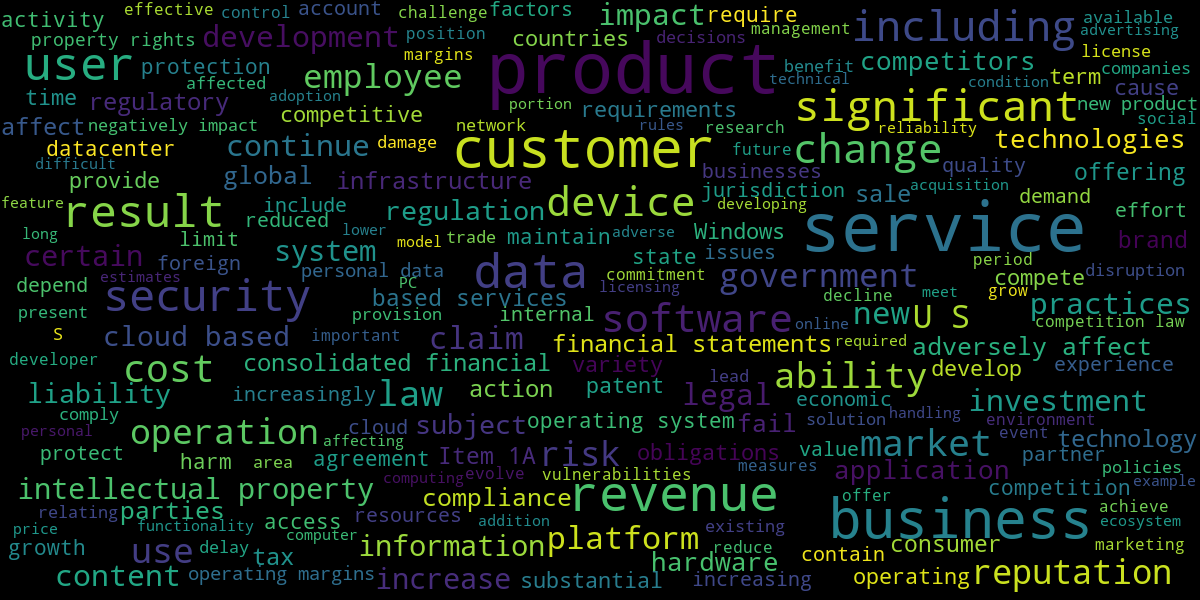

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 600, max_font_size=70, prefer_horizontal = 1,stopwords = myformanalysis.entities_text_ + list(myform.nlp.Defaults.stop_words)).generate_from_text(myform.text_section_)
wordcloud.to_image()